In [18]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# !python --version

cc 100 50


<IPython.core.display.Javascript object>


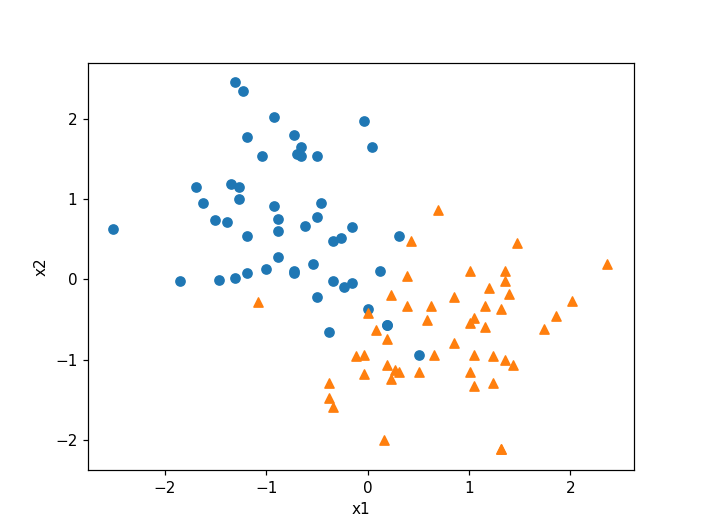

In [19]:
x = np.loadtxt('ass1_data/data/q4/q4x.dat')
y = np.loadtxt('ass1_data/data/q4/q4y.dat', dtype='U')

# x = x[11:69]
# y = y[11:69]

n = np.size(x, 1)
m = np.size(y)

count = 0
for i in range(m):
    if y[i] == 'Alaska':
        y[i] = 0
        count += 1
    else:
        y[i] = 1

y = y.astype('int32')
        
print("cc", m, count)
    
# normalize
for i in range(n):
    x[:,i] = (x[:,i] - x[:,i].mean()) / x[:,i].std()
    
x1_0 = []
x2_0 = []
x1_1 = []
x2_1 = []
for i in range(m):
    if y[i] == 0:
        x1_0.append(x[i][0])
        x2_0.append(x[i][1])
    else:
        x1_1.append(x[i][0])
        x2_1.append(x[i][1])
        

        
plt.scatter(x1_0, x2_0, marker='o')
plt.scatter(x1_1, x2_1, marker='^')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
    
x = x.reshape((m, n, 1))

s [[-37.7647164 ]
 [ 34.25471528]] 50 [[ 37.7647164 ]
 [-34.25471528]] 50
m [[[-0.75529433]
  [ 0.68509431]]

 [[ 0.75529433]
  [-0.68509431]]]
[[1.11022302e-15]] 0.0 [[-3.38925452]
 [ 2.43858399]] [[1.11022302e-15]]


<IPython.core.display.Javascript object>


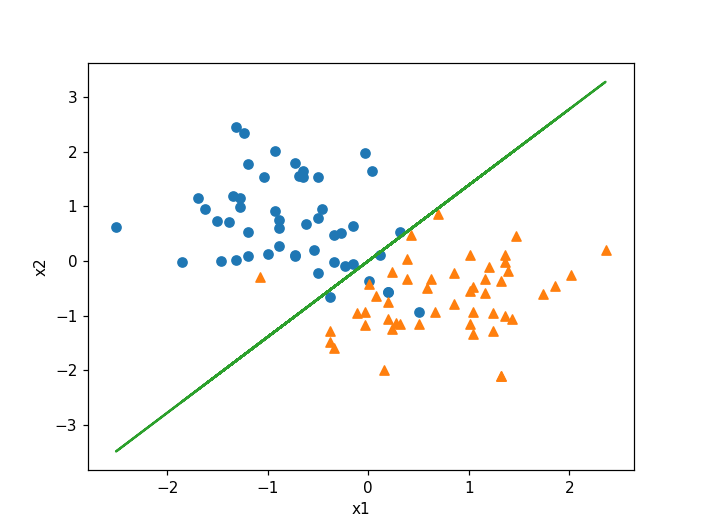

[[[-0.75529433]
  [ 0.68509431]]

 [[ 0.75529433]
  [-0.68509431]]]


In [20]:
summation1 = np.zeros((n, 1))
summation2 = 0
summation3 = np.zeros((n, 1))
summation4 = 0
summation5 = np.zeros((n, n))

for i in range(m):
    summation1 += int(y[i] == 0) * x[i]
    summation2 += int(y[i] == 0)
    summation3 += int(y[i] == 1) * x[i]
    summation4 += int(y[i] == 1)

phi = summation4 / m
mu0 = summation1 / summation2
mu1 = summation3 / summation4
print("s", summation1, summation2, summation3, summation4)
mu = np.array([mu0, mu1])

print("m", mu)

for i in range(m):
    summation5 += np.matmul(x[i] - mu[y[i]], (x[i] - mu[y[i]]).T)
    
sigma = summation5 / m
sigma_inv = np.linalg.inv(sigma)
# np.log(phi/(1-phi))

t1 = (mu[0].T @ sigma_inv @ mu[0] - mu[1].T @ sigma_inv @ mu[1])/2
t2 = np.log(phi/(1-phi))
t3 = sigma_inv @ (mu[0] - mu[1])
print(t1, t2, t3, t1 - t2)
# xT = (t1 - t2) @ t3 @ sigma

# t3[0] x1 + t3[1] x2 = t1 - t2

def get_x2(x1):
    return ((t1 - t2) - (t3[0] * x1))/t3[1]

# x[:, 0, 0]
plt.plot(x[:, 0, 0], [get_x2(x1)[0][0] for x1 in x[:, 0, 0]], 'C2')

x1_0 = []
x2_0 = []
x1_1 = []
x2_1 = []
for i in range(m):
    if y[i] == 0:
        x1_0.append(x[i][0])
        x2_0.append(x[i][1])
    else:
        x1_1.append(x[i][0])
        x2_1.append(x[i][1])        
plt.scatter(x1_0, x2_0, marker='o')
plt.scatter(x1_1, x2_1, marker='^')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

print(mu)

In [21]:
summation6 = np.zeros((n, n))
summation7 = np.zeros((n, n))

for i in range(m):
    summation6 += int(y[i] == 0) * (x[i] - mu[y[i]]) @ (x[i] - mu[y[i]]).T
    summation7 += int(y[i] == 1) * (x[i] - mu[y[i]]) @ (x[i] - mu[y[i]]).T
    
sigma0 = summation6 / summation2
sigma1 = summation7 / summation4

print(sigma0, sigma1)

[[ 0.38158978 -0.15486516]
 [-0.15486516  0.64773717]] [[0.47747117 0.1099206 ]
 [0.1099206  0.41355441]]


[[2.33329319 0.09881246]
 [0.09881246 1.88868084]]
[1.91299634]


<IPython.core.display.Javascript object>


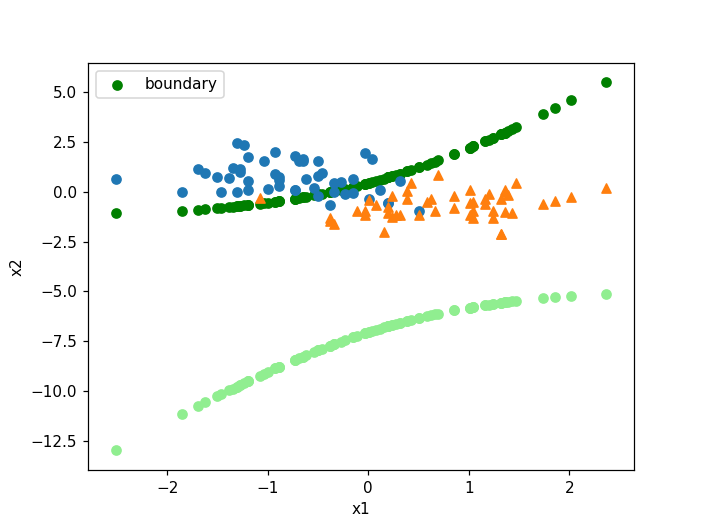

In [57]:
sigma0_inv = np.linalg.inv(sigma0)
sigma1_inv = np.linalg.inv(sigma1)

LHS = np.log(phi/(1-phi)) + (1/2)*np.log(np.linalg.det(sigma0)/np.linalg.det(sigma1))

c = (mu1.T @ sigma1_inv @ mu1) - (mu0.T @ sigma0_inv @ mu0)

x2 = 1

M = sigma1_inv - sigma0_inv
print(sigma_inv)
a, b, c, d = M[0][0], M[0][1], M[1][0], M[1][1]

e = sigma1_inv @ mu1
f = sigma0_inv @ mu0

# coeff2 = a / 2
# coeff1 = (b + c) * x2 - e[0] + f[0]
# coeff0 = (d * (x2**2) / 2) - (e[1] * x2) + (f[1] * x2) + c - LHS


print(coeff0)


def get_x1(x2):
    coeff_2 = a / 2
    coeff_1 = ((b + c) * x2)/2 - e[0] + f[0]
    coeff_0 = (d * (x2**2) / 2) - (e[1] * x2) + (f[1] * x2) + c - LHS
    return np.roots([coeff_2, coeff_1, coeff_0])

def get_x2(x1):
    coeff_2 = d / 2
    coeff_1 = (((b + c) * x1) / 2) - e[1] + f[1]
    coeff_0 = (a * (x1**2) / 2) - (e[0] * x1) + (f[0] * x1) + c - LHS
    return np.roots([coeff_2, coeff_1, coeff_0])

x2_0 = []
x2_1 = []
for x1 in x[:, 0, 0]:
    x2 = get_x2(x1)
    if x2[0] > x2[1]:
        x2_0.append(x2[0])
        x2_1.append(x2[1])
    else:
        x2_0.append(x2[1])
        x2_1.append(x2[0])

plt.scatter(x[:, 0, 0], x2_0, color="green", label="boundary")
plt.scatter(x[:, 0, 0], x2_1, color="lightgreen")
plt.legend()

# plt.scatter(x[:, 0, 0], [get_x2(x1)[0] for x1 in x[:, 0, 0]], color="red")
# plt.scatter([get_x1(x2)[1] for x2 in x[:, 1, 0]], x[:, 1, 0])
# plt.scatter([get_x1(x2)[0] for x2 in x[:, 1, 0]], x[:, 1, 0])

x1_0 = []
x2_0 = []
x1_1 = []
x2_1 = []
for i in range(m):
    if y[i] == 0:
        x1_0.append(x[i][0])
        x2_0.append(x[i][1])
    else:
        x1_1.append(x[i][0])
        x2_1.append(x[i][1])        
plt.scatter(x1_0, x2_0, marker='o')
plt.scatter(x1_1, x2_1, marker='^')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# print([get_x1(x2)[1] for x2 in x[:, 1, 0]])